In [1]:
import data_preprocessing
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
with open("../Daten/2020 Q1/drug-event-0001-of-0033.json", "r") as file:
    json_data = json.load(file)
    data = json_data["results"]
df_new = pd.json_normalize(data)

df_new = data_preprocessing.filter_data(df_new)

In [3]:
df_2019 = pd.read_pickle(r"C:\Users\Paul Strohmeier\Desktop\Drug-data\pickle\data2019_data_analysis.pkl")

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   reporttype                     12000 non-null  object
 1   serious                        12000 non-null  object
 2   seriousnessother               4595 non-null   object
 3   receivedate                    12000 non-null  object
 4   primarysource.reportercountry  12000 non-null  object
 5   primarysource.qualification    11578 non-null  object
 6   patient.patientsex             10670 non-null  object
 7   patient.reaction               12000 non-null  object
 8   patient.drug                   12000 non-null  object
 9   seriousnesshospitalization     2924 non-null   object
 10  patient.patientonsetage        7318 non-null   object
 11  patient.patientonsetageunit    7318 non-null   object
 12  patient.patientweight          2498 non-null   object
 13  s

In [12]:
df = data_preprocessing.preprocess_for_visualization(df_new)
df = data_preprocessing.preprocess_data(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7318 entries, 0 to 7317
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   serious                                   7318 non-null   int64         
 1   receivedate                               7318 non-null   datetime64[ns]
 2   min_one_pres                              7318 non-null   int64         
 3   age                                       7318 non-null   int64         
 4   report_spontaneous                        7318 non-null   int64         
 5   report_from_study                         7318 non-null   int64         
 6   report_other                              7318 non-null   int64         
 7   report_unknown                            7318 non-null   int64         
 8   qualification_physician                   7318 non-null   int64         
 9   qualification_pharmacist      

In [121]:
import os
import datetime

# Aktuelles Datum abrufen
current_date = datetime.date.today()

# Ordnername erstellen
folder_name = current_date.strftime('%Y-%m-%d')
folder_path = os.path.join("../Grafiken/generated/", folder_name)

# Ordner erstellen
os.makedirs(folder_path)

In [50]:
df_serious = df[df.serious == 1]
df_ns = df[df.serious == 0]

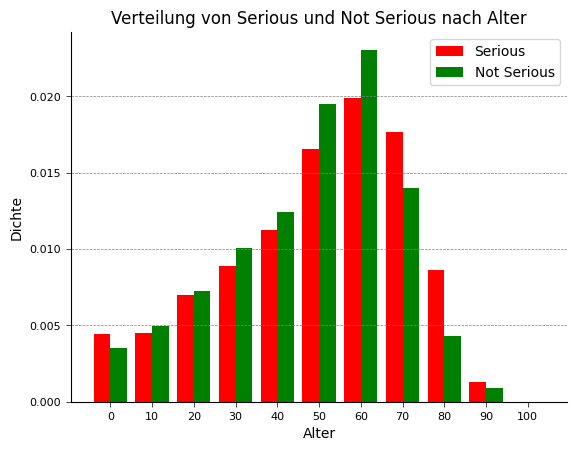

In [123]:
# Histogramm nach IBCS

# Definiere die Bins-Intervalle
bins = [i * 10 for i in range(12)]  # [0, 10, 20, ..., 100, 110]

# Histogramm erstellen mit den definierten Bins
plt.hist([df_serious.age, df_ns.age], bins=bins, density=True, color=['red', 'green'], label=['Serious', 'Not Serious'], align='left', rwidth=0.8)

# Setze die Achsentitel
plt.xlabel('Alter')
plt.ylabel('Dichte')

# Setze den Titel des Histogramms
plt.title('Verteilung von Serious und Not Serious nach Alter')

# Entferne die obere und rechte Achsenlinie
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setze die Achsentick-Positionierung
plt.gca().tick_params(axis='both', which='both', direction='out')
plt.gca().xaxis.set_tick_params(width=0.5)
plt.gca().yaxis.set_tick_params(width=0.5)

# Setze die Achsentick-Labels
plt.xticks(range(0, 101, 10), fontsize=8)
plt.yticks(fontsize=8)

# Setze die Achsentick-Linien
plt.gca().yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

# Füge den statischen Text als Tooltip hinzu (auf Website)
tooltip_text = 'Dieses Histogramm zeigt die Verteilung des Alters für den "Serious" und den "Not Serious" Fall. Da die Anzahl der Ereignisse in beiden Kategorien unterschiedlich ist, wird ein Dichte-Histogramm verwendet, um die Vergleichbarkeit der Verteilungen zu gewährleisten.'

# Grafik im richtigen Ordner abspeichern
plt.savefig(os.path.join(folder_path, "Verteilung_Alter_Serious"), bbox_inches='tight')

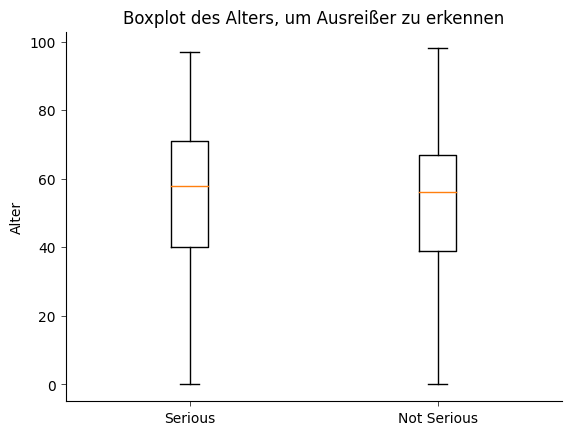

In [124]:
# Boxplot-Diagramm erstellen
plt.boxplot([df_serious.age, df_ns.age], labels=['Serious', 'Not Serious'])
plt.title('Boxplot des Alters, um Ausreißer zu erkennen')
plt.ylabel('Alter')

# y-Achse an der linken Seite positionieren
ax = plt.gca()
ax.yaxis.tick_left()
ax.yaxis.set_label_position('left')

# Achsentick-Positionierung
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Entferne überflüssige Rahmenlinien
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Hintergrundfarbe anpassen
plt.gca().set_facecolor('white')

# Anpassungen der Linienstärke
plt.gca().xaxis.set_tick_params(width=0.5)
plt.gca().yaxis.set_tick_params(width=0.5)

# Grafik im richtigen Ordner abspeichern
plt.savefig(os.path.join(folder_path, "Boxplot_Alter"), bbox_inches='tight')

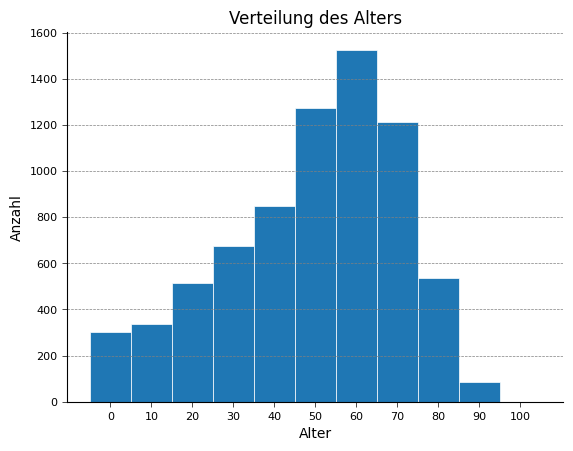

In [125]:
# Histogramm nach IBCS

# Definiere die Bins-Intervalle
bins = [i * 10 for i in range(12)]  # [0, 10, 20, ..., 100, 110]

# Histogramm erstellen mit den definierten Bins
plt.hist(df.age, bins=bins, density=False, align='left', edgecolor='white', linewidth=0.5)

# Setze die Achsentitel
plt.xlabel('Alter')
plt.ylabel('Anzahl')

# Setze den Titel des Histogramms
plt.title('Verteilung des Alters')

# Entferne die obere und rechte Achsenlinie
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setze die Achsentick-Positionierung
plt.gca().tick_params(axis='both', which='both', direction='out')
plt.gca().xaxis.set_tick_params(width=0.5)
plt.gca().yaxis.set_tick_params(width=0.5)

# Setze die Achsentick-Labels
plt.xticks(range(0, 101, 10), fontsize=8)
plt.yticks(fontsize=8)

# Setze die Achsentick-Linien
plt.gca().yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# Grafik im richtigen Ordner abspeichern
plt.savefig(os.path.join(folder_path, "Verteilung_Alter"), bbox_inches='tight')

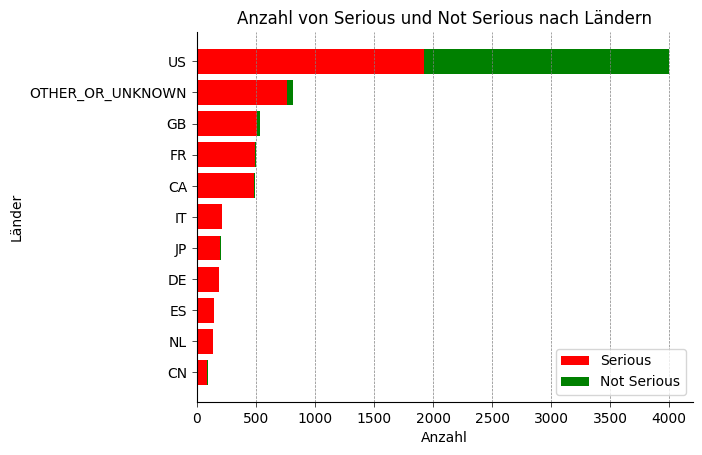

In [126]:
country_counts_serious = []
country_counts_ns = []

# Liste der Länder-Spalten
country_columns = df.filter(regex='country').columns

for country in country_columns:
    country_counts_serious.append(df_serious[country].sum())
    country_counts_ns.append(df_ns[country].sum())

# Anzahl der Länder
num_countries = len(country_columns)

# Positionen der Balken
bar_positions = np.arange(num_countries)

# Breite der Balken
bar_width = 0.35

# Umwandeln der Werte und Indizes in NumPy-Arrays
country_counts_serious = np.array(country_counts_serious)
country_counts_ns = np.array(country_counts_ns)

# Sortiere die Balken nach der Anzahl der "Serious" Fälle
sorted_indices = np.argsort(country_counts_serious)[::-1]
sorted_country_counts_serious = country_counts_serious[sorted_indices]
sorted_country_counts_ns = country_counts_ns[sorted_indices]
sorted_country_columns = country_columns[sorted_indices]

# Erstelle das Balkendiagramm für die "Serious" Fälle
plt.barh(bar_positions, sorted_country_counts_serious, label='Serious', color='red')

# Erstelle das Balkendiagramm für die "Not Serious" Fälle auf den bereits vorhandenen Balken
plt.barh(bar_positions, sorted_country_counts_ns, label='Not Serious', color='green', left=sorted_country_counts_serious)

# Achsentitel
plt.title("Anzahl von Serious und Not Serious nach Ländern")
plt.xlabel('Anzahl')
plt.ylabel('Länder')

# Achsentick-Positionen
y_tick_labels = [country[8:].upper() for country in sorted_country_columns]
plt.yticks(bar_positions, y_tick_labels)

# Legende
plt.legend()
plt.gca().invert_yaxis()

# Entferne die obere und rechte Achsenlinie
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setze die Achsentick-Positionierung
plt.gca().tick_params(axis='both', which='both', direction='out')
plt.gca().xaxis.set_tick_params(width=0.5)
plt.gca().yaxis.set_tick_params(width=0.5)
# Setze die Achsentick-Linien
plt.gca().xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

country_counts_serious = []
country_counts_ns = []

# Grafik im richtigen Ordner abspeichern
plt.savefig(os.path.join(folder_path, "Anzahl_Länder_Serious"), bbox_inches='tight')

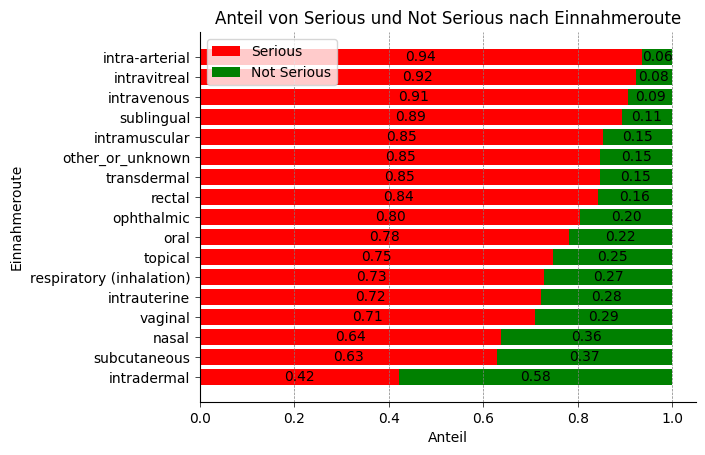

In [128]:
# Liste der Einnahmerouten
routes_columns = df.filter(regex='route').columns

# Anzahl der Einnahmerouten
num_routes = len(routes_columns)

# Anteil der "Serious" Fälle pro Einnahmeroute
serious_percentages = []

# Anteil der "Not Serious" Fälle pro Einnahmeroute
ns_percentages = []

for route in routes_columns:
    total_count = df[route].sum()
    serious_count = df_serious[route].sum()
    ns_count = df_ns[route].sum()
    
    serious_percentages.append(serious_count / total_count)
    ns_percentages.append(ns_count / total_count)

# Sortiere die Einnahmerouten nach dem Anteil von "Serious"
sorted_indices = np.argsort(serious_percentages)
sorted_routes_columns = np.array(routes_columns)[sorted_indices]
sorted_serious_percentages = np.array(serious_percentages)[sorted_indices]
sorted_ns_percentages = np.array(ns_percentages)[sorted_indices]

# Positionen der Säulen
bar_positions = np.arange(num_routes)

# Breite der Säulen
bar_width = 0.8

# Erstelle das gestapelte horizontale Säulendiagramm
plt.barh(bar_positions, sorted_serious_percentages, label='Serious', color='red')
plt.barh(bar_positions, sorted_ns_percentages, left=sorted_serious_percentages, label='Not Serious', color='green')

# Achsentitel
plt.title("Anteil von Serious und Not Serious nach Einnahmeroute")
plt.xlabel('Anteil')
plt.ylabel('Einnahmeroute')

# Achsentick-Positionen
y_tick_labels = [route[6:] for route in sorted_routes_columns]
plt.yticks(bar_positions, y_tick_labels)

# Legende
plt.legend()

# Entferne die obere und rechte Achsenlinie
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Setze die Achsentick-Positionierung
plt.gca().tick_params(axis='both', which='both', direction='out')
plt.gca().xaxis.set_tick_params(width=0.5)
plt.gca().yaxis.set_tick_params(width=0.5)

# Setze die Achsentick-Linien
plt.gca().xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

# Annotations
for i, (serious, ns) in enumerate(zip(sorted_serious_percentages, sorted_ns_percentages)):
    plt.annotate(f'{serious:.2f}', xy=(serious/2, i), ha='center', va='center', color='black')
    plt.annotate(f'{ns:.2f}', xy=(serious+ns/2, i), ha='center', va='center', color='black')

# Grafik im richtigen Ordner abspeichern
plt.savefig(os.path.join(folder_path, "Anteil_Routes_Serious"), bbox_inches='tight')

In [4]:
df_2019_s = df_2019[df_2019.serious == 1]
df_2019_ns = df_2019[df_2019.serious == 0]

In [5]:
df_2019_s.gender_male.value_counts()

gender_male
0    52202
1    41533
Name: count, dtype: int64

In [6]:
df_2019.gender_male.value_counts()

gender_male
0    96976
1    61763
Name: count, dtype: int64